In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Simple Linear Regression

● Use the scikit-learn library.

In [109]:
from sklearn.linear_model import LinearRegression

● Load the California Housing Dataset (or any house price dataset).

In [110]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


● Predict the house price using a single feature (e.g., number of rooms).

In [111]:
X = data[['total_rooms']]
y = data['median_house_value']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


● Train a simple linear regression model.

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
X_fit = np.linspace(X['total_rooms'].min(), X['total_rooms'].max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


● Plot the regression line using matplotlib.

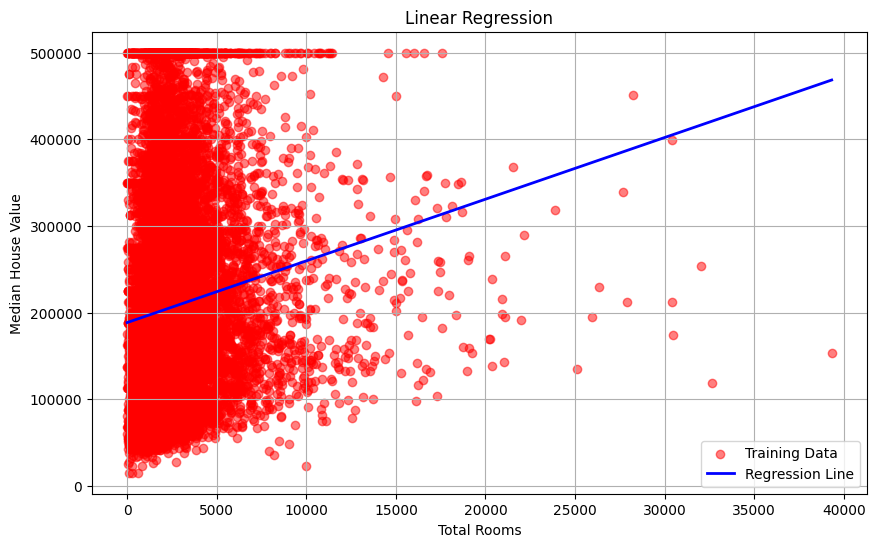

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', alpha=0.5, label='Training Data')
plt.plot(X_fit, y_fit, color='blue', linewidth=2, label='Regression Line')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

## Task2. Multiple Linear Regression

In [115]:
from sklearn.metrics import r2_score, mean_squared_error

● Use the same dataset or load another dataset with at least 4 numeric
features.



In [116]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


● Predict the target variable using multiple independent variables.


In [117]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = data.drop(columns='median_house_value')
y = data['median_house_value']

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [118]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

● Evaluate the model using:

○ R-squared


In [120]:
r2_score(y_test, y_pred)

0.6143987268246021

○ Mean Squared Error (MSE)


In [121]:
mse = mean_squared_error(y_test, y_pred)
mse

5052953703.901634

○ Root Mean Squared Error (RMSE)


In [122]:
np.sqrt(mse)


71084.13116794518

● Display the coefficients of each feature.

In [123]:
pd.Series(model.coef_, index=X.columns)

longitude            -42632.391717
latitude             -42450.071864
housing_median_age     1182.809649
total_rooms              -8.187977
total_bedrooms          116.260128
population              -38.492213
households               46.342572
median_income         40538.404387
dtype: float64

## Task3. Feature Scaling and Normalization

In [124]:
from sklearn.preprocessing import StandardScaler

● Demonstrate the effect of standardizing features using StandardScaler.

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [127]:
r2_score(y_test, y_pred_scaled)

0.6143987268246023

In [128]:
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mse_scaled

5052953703.90163

In [129]:
np.sqrt(mse_scaled)

71084.13116794515

● Compare model performance before and after scaling.

In [130]:
# before Scaling
pd.Series(model.coef_, index=X.columns)

longitude            -42632.391717
latitude             -42450.071864
housing_median_age     1182.809649
total_rooms              -8.187977
total_bedrooms          116.260128
population              -38.492213
households               46.342572
median_income         40538.404387
dtype: float64

In [131]:
# after Scaling
pd.Series(model_scaled.coef_, index=X.columns)

longitude            -85503.218153
latitude             -90698.848803
housing_median_age    14905.906448
total_rooms          -17805.418501
total_bedrooms        48712.343341
population           -43766.491159
households            17654.500659
median_income         77194.699466
dtype: float64

## Task4. Model Interpretation

In [136]:
import seaborn as sns

● Write Python code to:

○ Show the correlation matrix using a heatmap.


In [134]:
corr_matrix = data.corr(numeric_only=True)

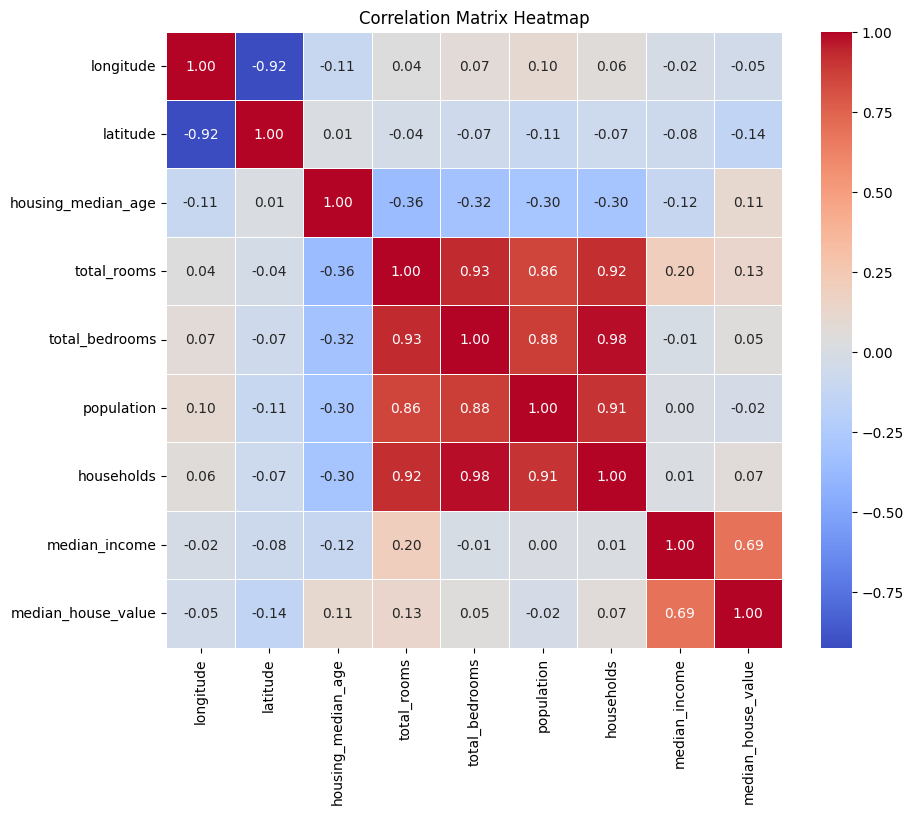

In [137]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

○ Identify which features have the strongest relationship with
the target.


In [144]:
cor_target = corr_matrix['median_house_value'].drop('median_house_value').sort_values(ascending=False)
print("\nFeatures most strongly correlated with Target (median_house_value):\n")
print(cor_target)


Features most strongly correlated with Target (median_house_value):

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


○ Discuss multicollinearity and how it might affect regression

In [ ]:
# If both are included in a Linear Regression model, it may lead to:

# Unstable coefficients

# Inflated variance, reducing interpretability

# Overfitting, especially with many correlated features